In [1]:
import os
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from numpy import random

import keras
from keras.datasets import mnist
from keras.layers import Conv2D, AveragePooling2D
from keras.layers import Dense, Flatten, Input
from keras.models import Sequential

2024-08-21 08:23:46.304437: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-21 08:23:46.490253: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-21 08:23:47.097094: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
base_dir = '/home/mca/220968424/week4'
local_zip = f'{base_dir}/cats_and_dogs_filtered.zip'

In [3]:
os.makedirs(base_dir, exist_ok=True)

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O {local_zip}

/bin/bash: /home/mca/anaconda3/envs/dse/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2024-08-21 08:23:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.183.91, 172.217.160.187, 142.250.70.91, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.183.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/home/mca/220968424/week4/cats_and_dogs_filtered.zip’

/home/mca/220968424 100%[===================>]  65.43M  16.3MB/s    in 5.8s    

2024-08-21 08:23:59 (11.3 MB/s) - ‘/home/mca/220968424/week4/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [5]:
if os.path.exists(local_zip):
    with zipfile.ZipFile(local_zip, 'r') as zip_ref:
        zip_ref.extractall(base_dir)
        print(f"Extracted all files to {base_dir}")
else:
    print(f"Error: The file {local_zip} does not exist.")

Extracted all files to /home/mca/220968424/week4


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
data_dir = f'{base_dir}/cats_and_dogs_filtered'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [8]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [9]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.514.jpg', 'cat.192.jpg', 'cat.39.jpg', 'cat.199.jpg', 'cat.163.jpg', 'cat.158.jpg', 'cat.714.jpg', 'cat.694.jpg', 'cat.745.jpg', 'cat.734.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


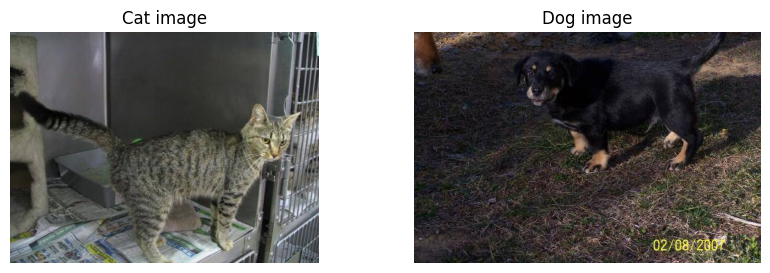

In [53]:
rand_cat_img = random.choice(train_cat_fnames)
cat_img_path = os.path.join(train_cats_dir, rand_cat_img)
cat_img = mpimg.imread(cat_img_path)

rand_dog_img = random.choice(train_dog_fnames)
dog_img_path = os.path.join(train_dogs_dir, rand_dog_img)
dog_img = mpimg.imread(dog_img_path)

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].imshow(cat_img)
axs[0].set_title("Cat image")
axs[0].axis('off')

axs[1].imshow(dog_img)
axs[1].set_title("Dog image")
axs[1].axis('off')

plt.show()

In [21]:
# LeNet5 = Sequential([
#     Input(shape=(64, 64, 3), name='input'),
#     Conv2D
#     AveragePooling2D
#     Conv2D
#     AveragePooling2D
#     Conv2D
#     Flatten
#     Dense
#     Dense(2, activation='softmax', name='output')
# ])

In [45]:
LeNet5 = Sequential()

LeNet5.add(Input(
    shape=(64, 64, 3),
    name='input'
))

LeNet5.add(Conv2D(
    filters=6,
    strides=(1, 1),
    padding="valid",
    kernel_size=(5,5),
    activation='tanh',
    name='conv_layer_1'
))

LeNet5.add(AveragePooling2D(
    pool_size=(2,2),
    strides=(2,2),
    padding="valid",
    name='pool_layer_1'
))

LeNet5.add(Conv2D(
    filters=16,
    strides=(1, 1),
    padding="valid",
    kernel_size=(5,5),
    activation='tanh',
    name='conv_layer_2'
))

LeNet5.add(AveragePooling2D(
    pool_size=(2,2),
    strides=(2,2),
    padding="valid",
    name='pool_layer_2'
))

LeNet5.add(Flatten(
))

LeNet5.add(Dense(
    units=120,
    activation='sigmoid',
    name='dense_layer_1'
))

LeNet5.add(Dense(
    units=84,
    activation='sigmoid',
    name='dense_layer_2'
))

LeNet5.add(Dense(
    units=2,
    activation='softmax',
    name='output'
))

In [46]:
LeNet5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 60, 60, 6)         456       
                                                                 
 pool_layer_1 (AveragePooli  (None, 30, 30, 6)         0         
 ng2D)                                                           
                                                                 
 conv_layer_2 (Conv2D)       (None, 26, 26, 16)        2416      
                                                                 
 pool_layer_2 (AveragePooli  (None, 13, 13, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 2704)              0         
                                                                 
 dense_layer_1 (Dense)       (None, 120)              

In [ ]:
LeNet5.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)